# Decision trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [4]:
df = df.dropna()

In [5]:
df = df[df["sex"] != "."]

### Data Visualization

<Axes: title={'center': 'Relation between Culmen (beak) dimensions and the species\n'}, xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

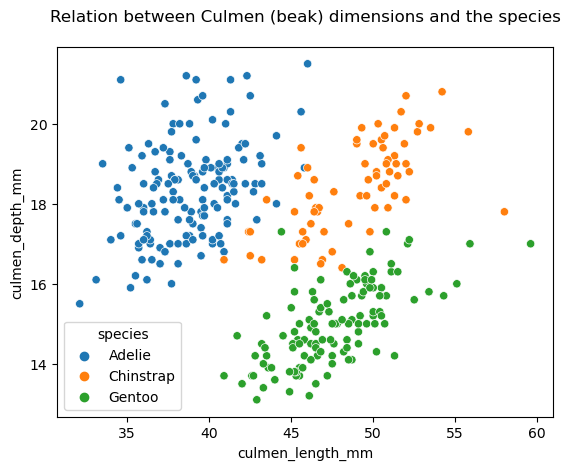

In [6]:
plt.title("Relation between Culmen (beak) dimensions and the species\n")
sns.scatterplot(data = df, x= "culmen_length_mm", y = "culmen_depth_mm", hue = "species")

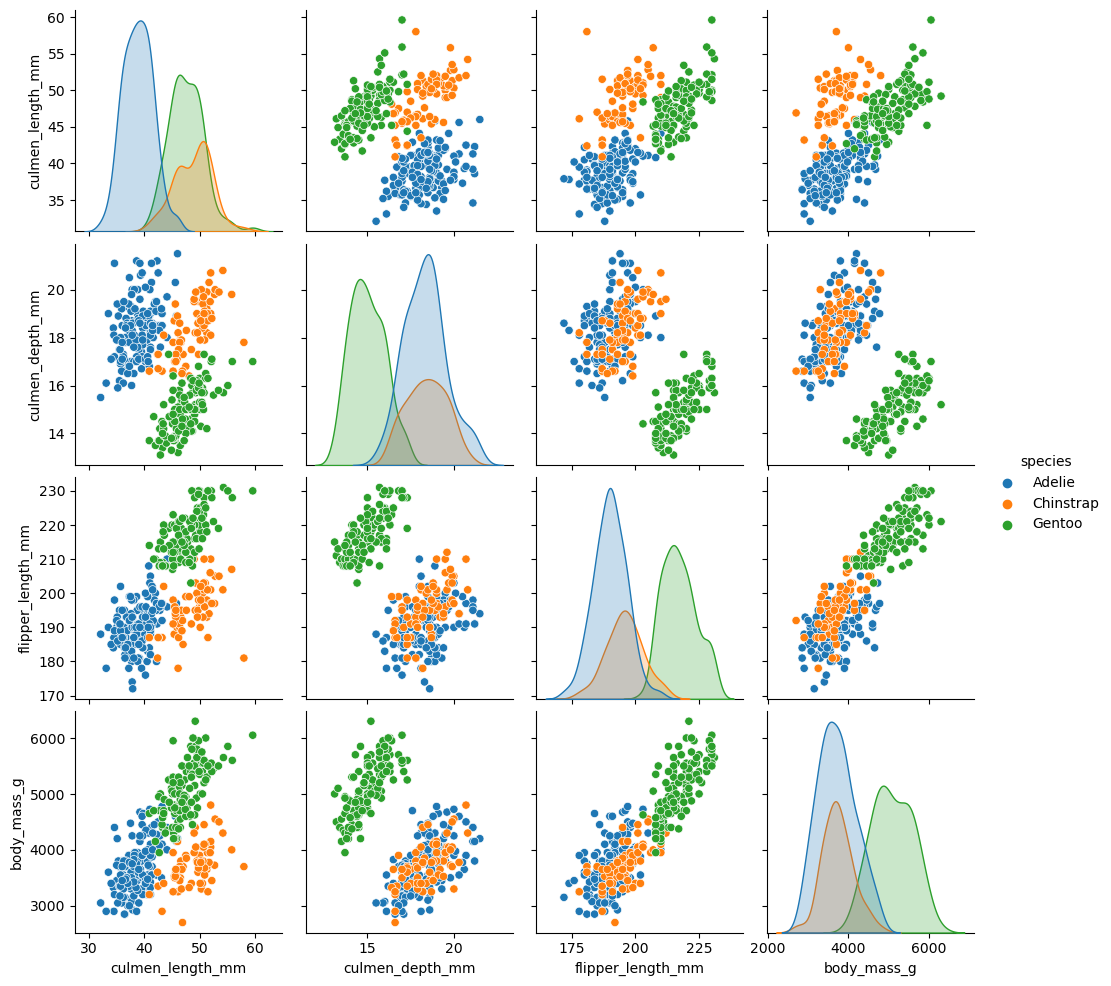

In [7]:
sns.pairplot(data = df, hue = "species")

### Data preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:
# encoding
X = pd.get_dummies(df.drop("species", axis = 1), drop_first= True)
y = df["species"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Model with default parameters

In [11]:
model = DecisionTreeClassifier()

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
predictions = model.predict(X_test)

#### Evaluation Plotting tree

In [14]:
from sklearn.tree import plot_tree

creating a function for easy evaluation

In [15]:
def tree_report(m):
    pred = m.predict(X_test)
    print(classification_report(y_test, pred))
    print("\n")
    plt.figure(figsize= (10,8), dpi =200)
    plot_tree(m, feature_names= list(X.columns), filled=True);

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100





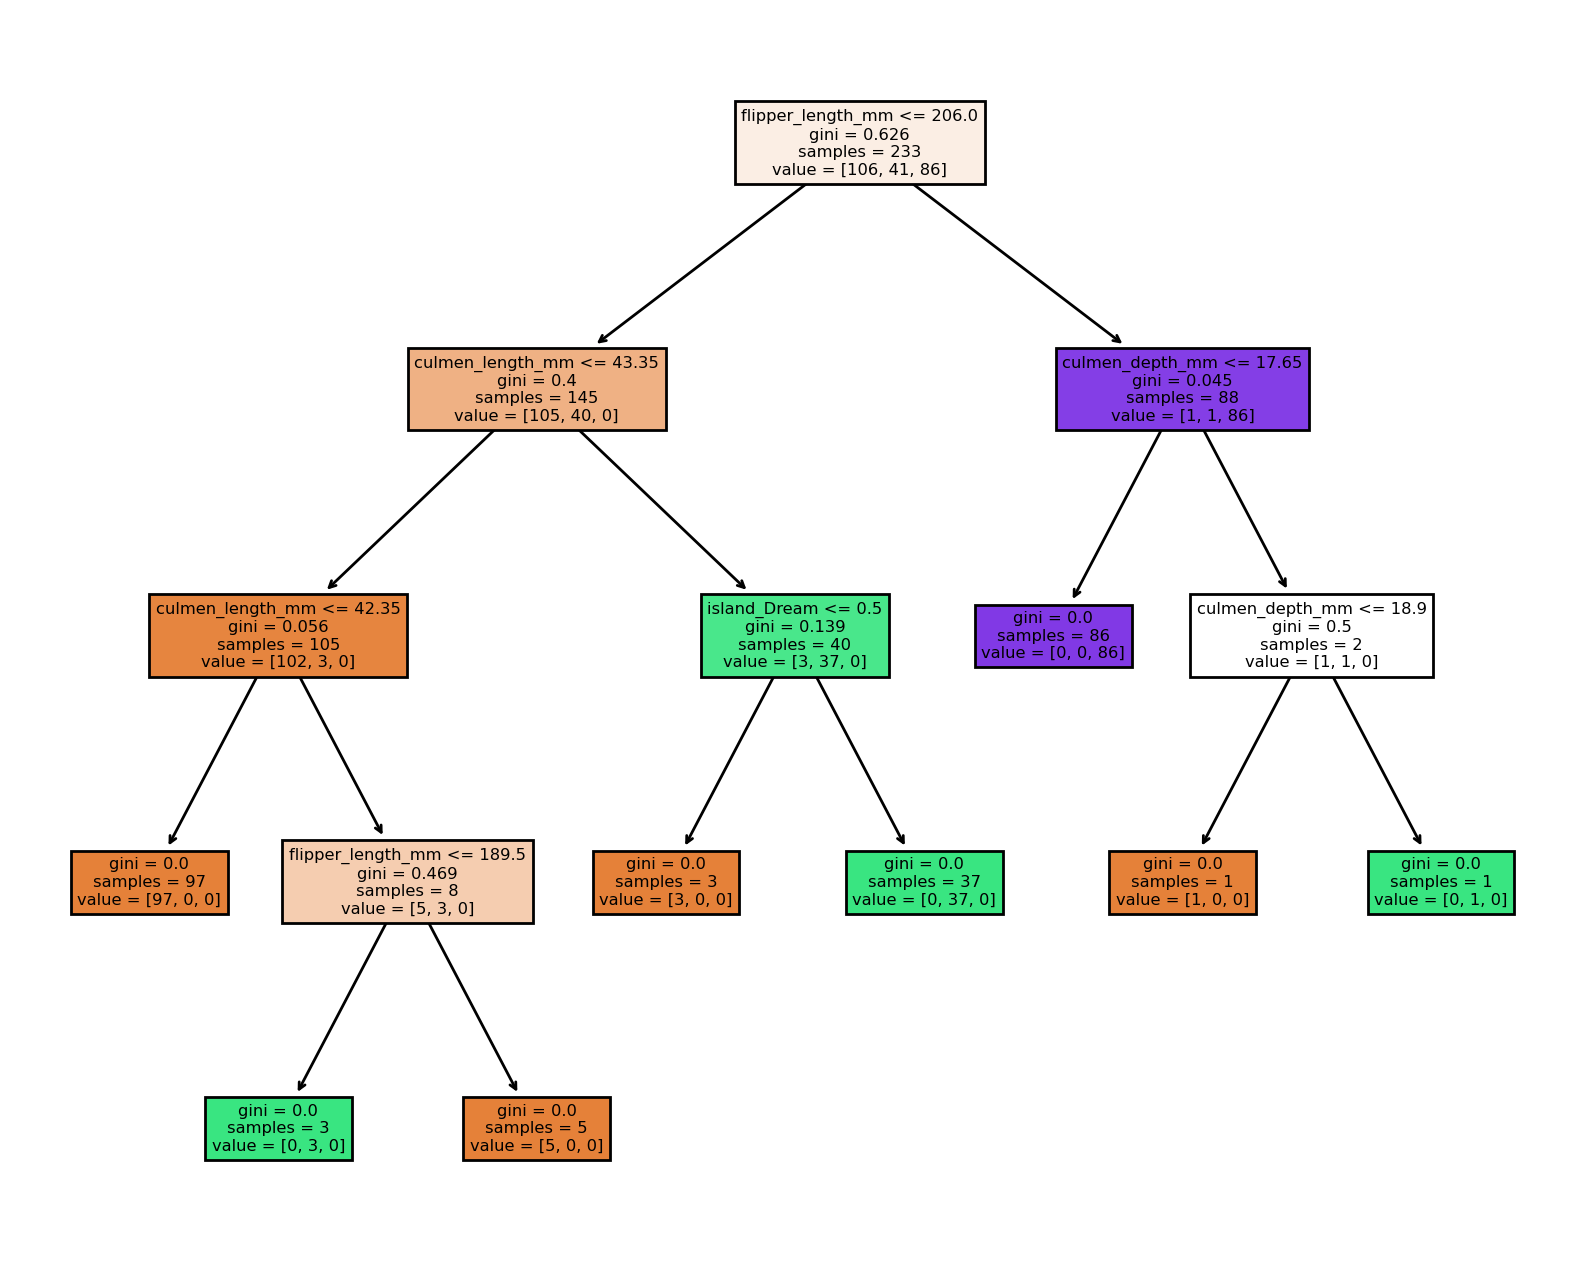

In [16]:
tree_report(model)

#### Pruned tree


In [17]:
pruned_model = DecisionTreeClassifier(max_depth=2)

In [18]:
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





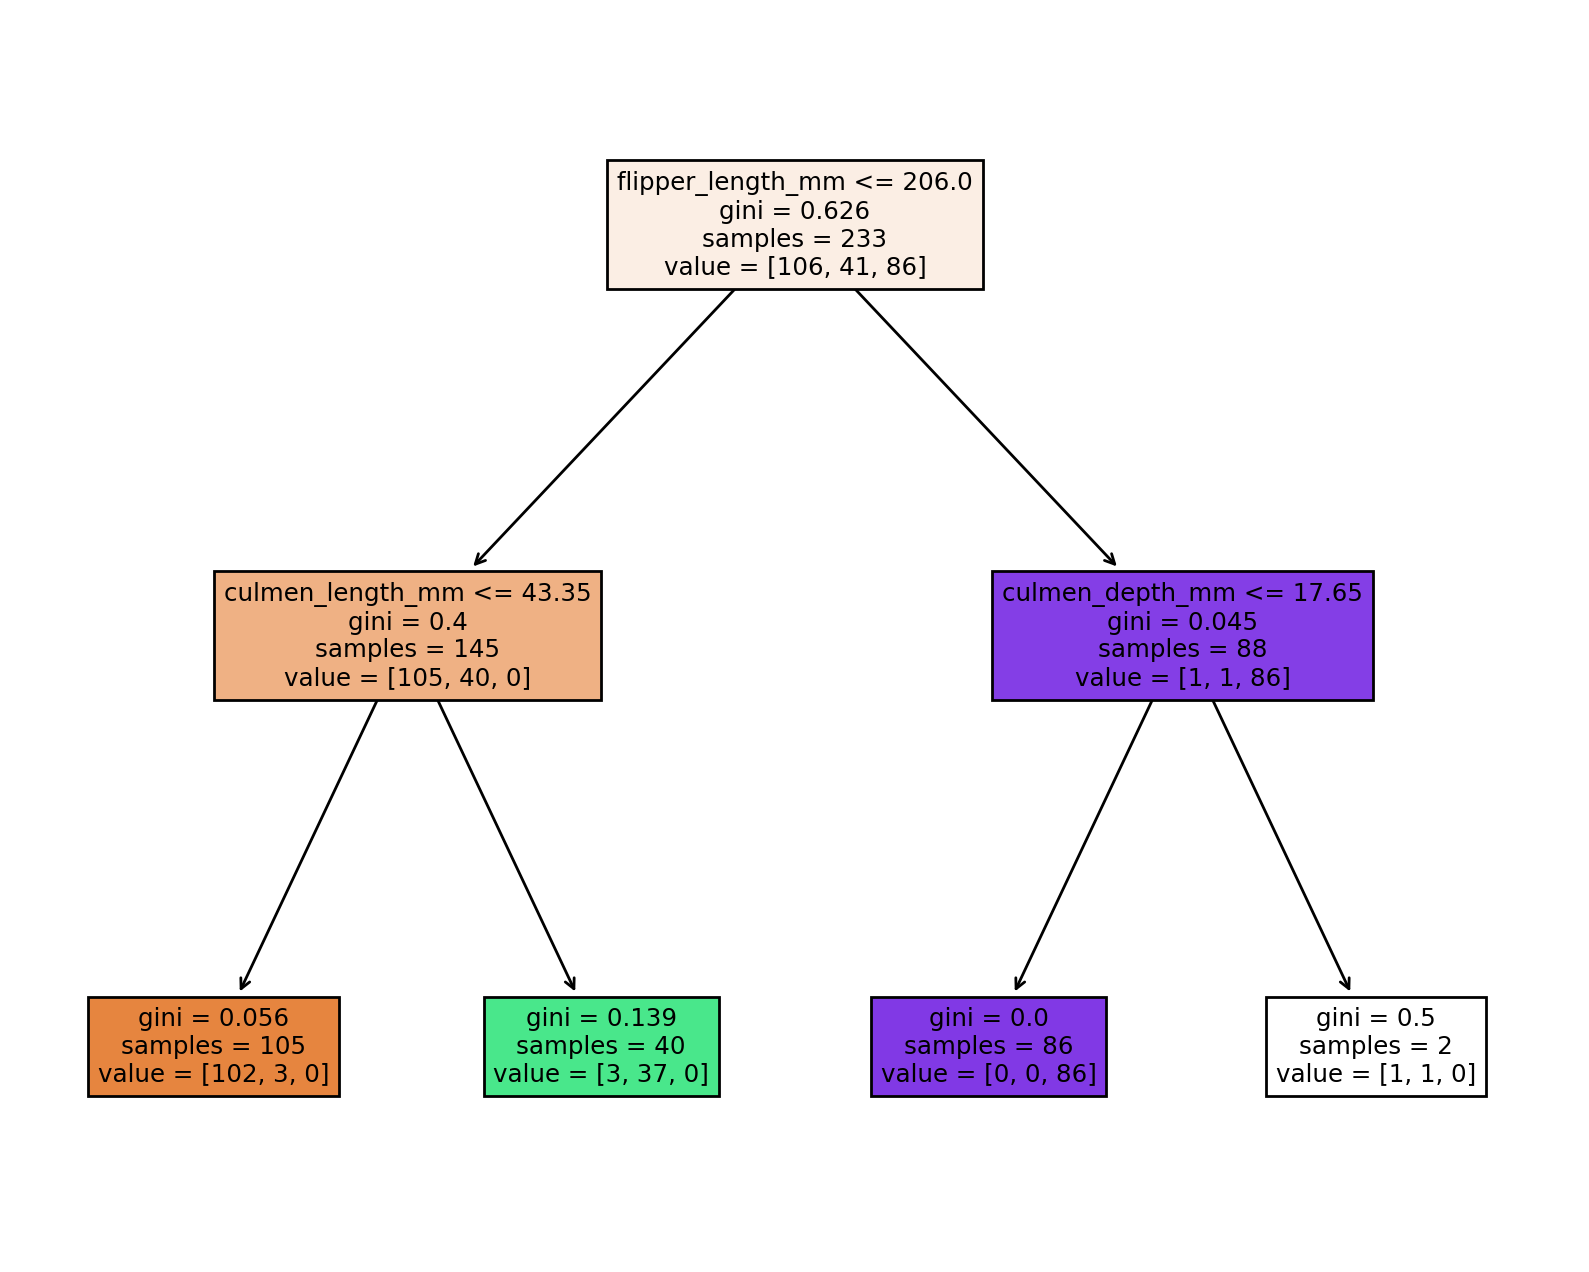

In [19]:
tree_report(pruned_model)

#### Max leafed tree

In [20]:
leafed_model = DecisionTreeClassifier(max_leaf_nodes=3)

In [21]:
leafed_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





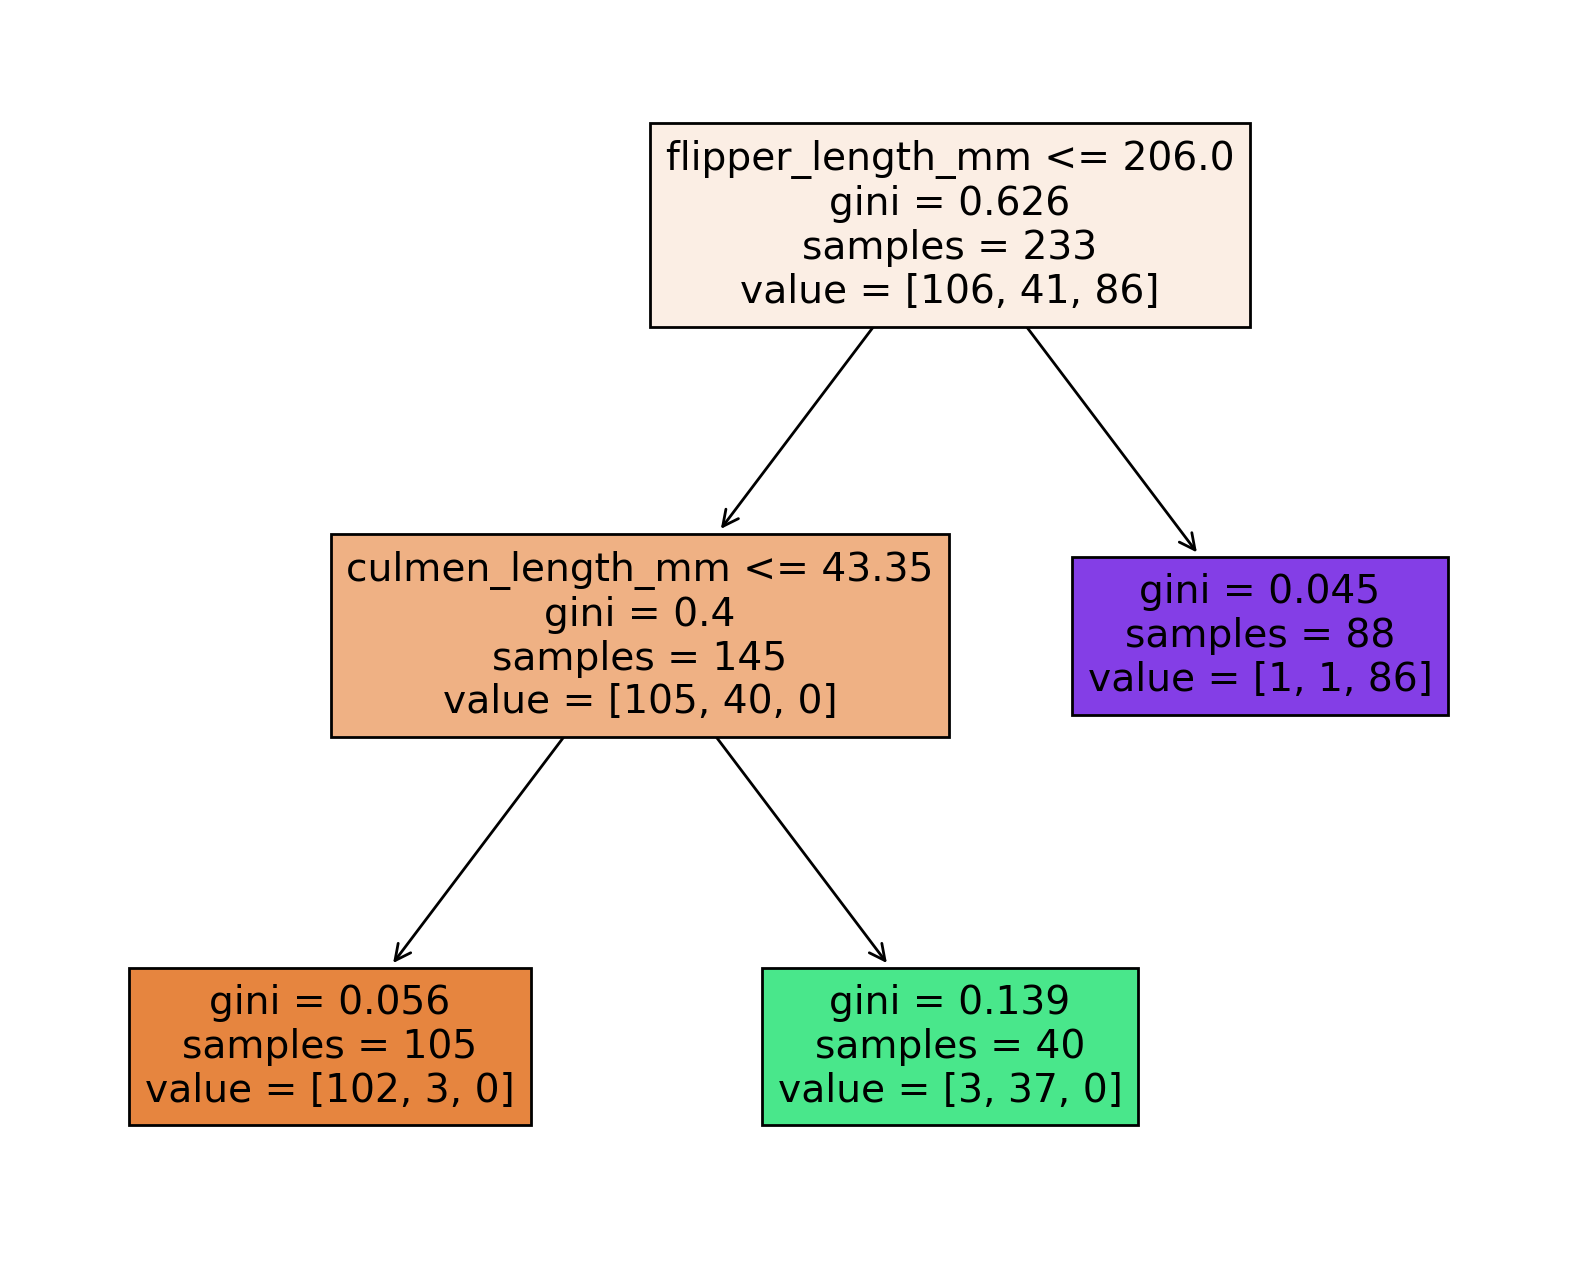

In [22]:
tree_report(leafed_model)

#### Entropy tree

In [23]:
entropy_model = DecisionTreeClassifier(criterion="entropy")

In [24]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100





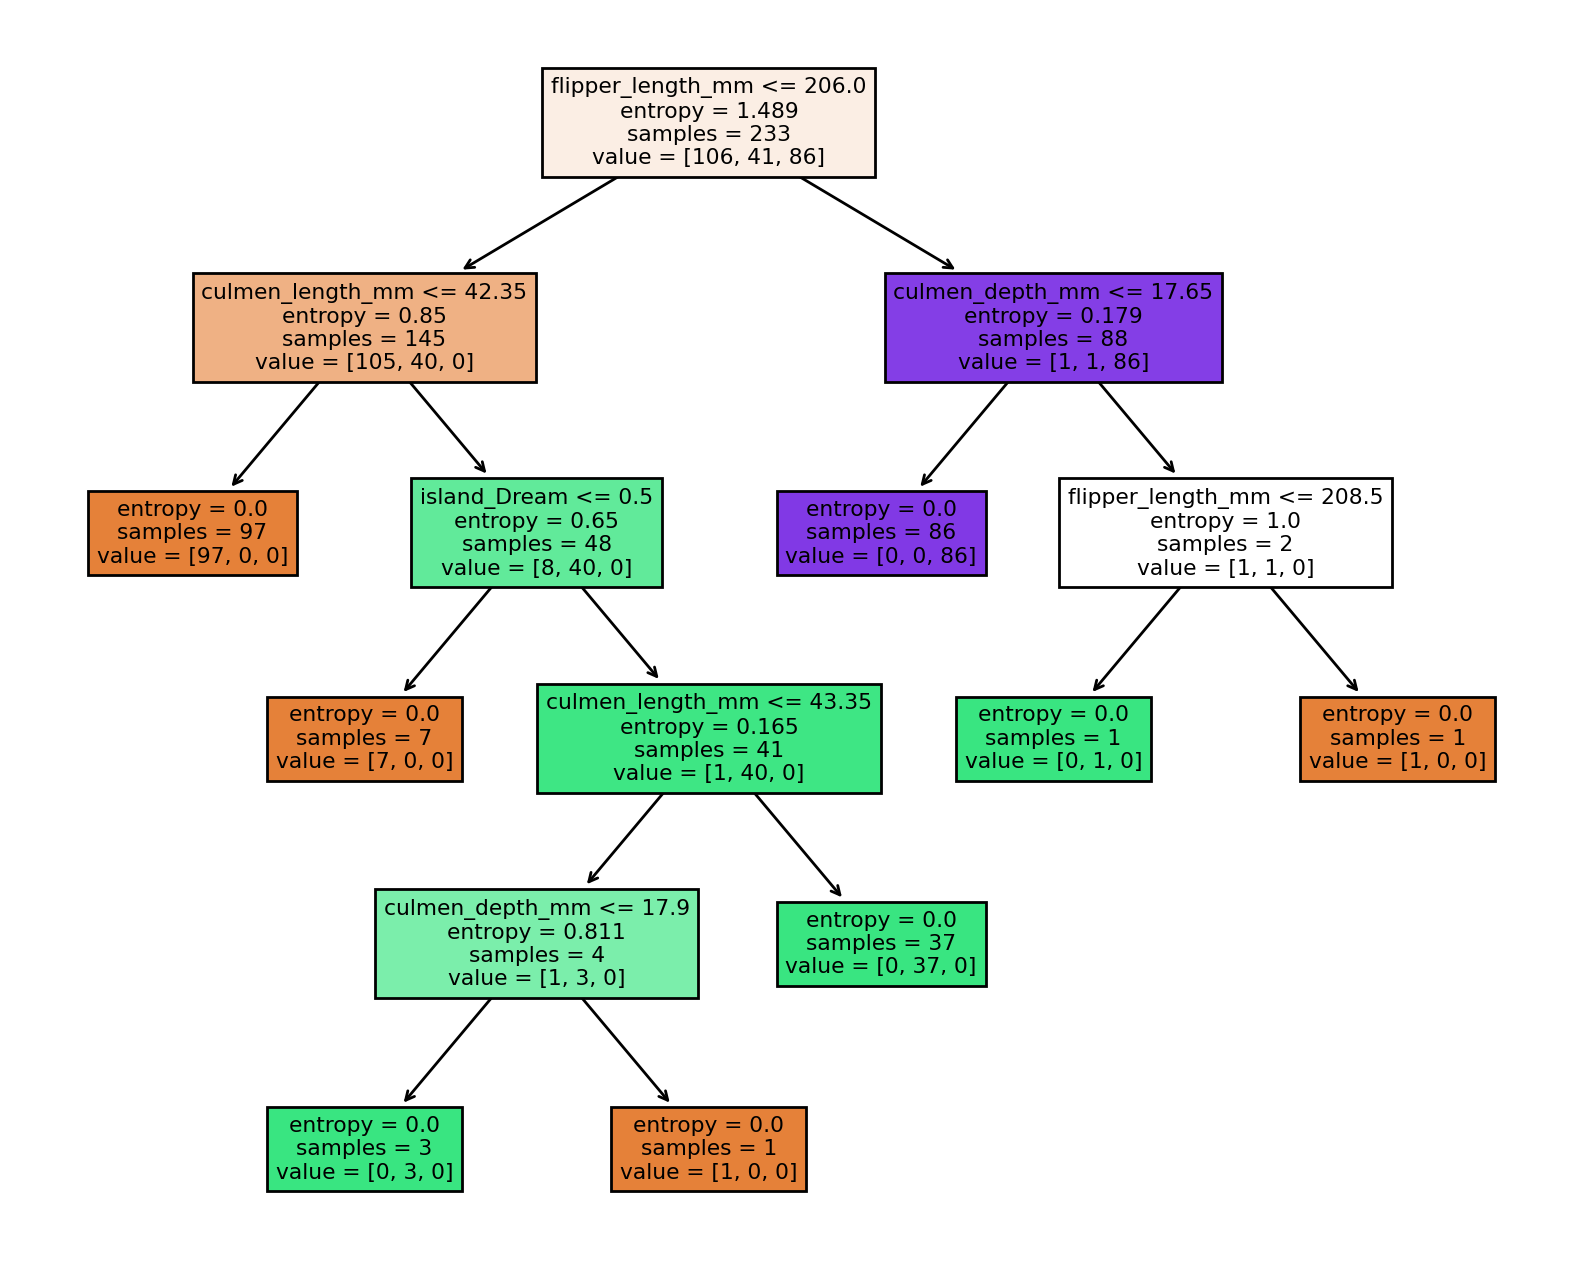

In [25]:
tree_report(entropy_model)

### All Decision trees tested gave very reasonable accuracy and F-1 scores. 